In [15]:
from scipy import stats
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('data/merged.csv')
df.columns

Index(['Zip Code', 'City', 'Pills', 'Tax Returns', 'AGI thousands',
       'Population', 'Death Rate'],
      dtype='object')

In [17]:
population = pd.DataFrame({
    'Pills': df['Pills'] / df['Population'],
    'Deaths': df['Death Rate'] * df['Population'] / 1e5
})
w = population['Pills'] > population['Pills'].mean()
sample = population[w]

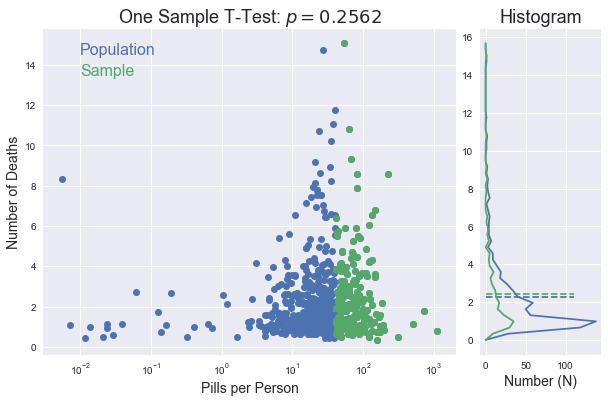

In [25]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 4)

plt.subplot(gs[0, :-1])
plt.plot(population['Pills'], population['Deaths'], 'o', label='Population')
plt.plot(sample['Pills'], sample['Deaths'], 'o', label='Sample')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim(3e-1, 2e1)
plt.xlabel('Pills per Person', size=14)
plt.ylabel('Number of Deaths', size=14)
#plt.legend(fontsize=14)
plt.title(r'One Sample T-Test: $p=0.2562$', size=18)
plt.text(0.01, 14.5, 'Population', color='C0', size=16)
plt.text(0.01, 13.5, 'Sample', color='C1', size=16)

plt.subplot(gs[0, 3])
nbins = 50
vert_hist = np.histogram(population['Deaths'], bins=np.linspace(0, 16, nbins))
plt.plot(vert_hist[0], vert_hist[1][:-1], '-')
vert_hist = np.histogram(sample['Deaths'], bins=np.linspace(0, 16, nbins))
plt.plot(vert_hist[0], vert_hist[1][:-1], '-')
#plt.ylim(3e-1, 2e1)
#plt.yticks(np.logspace(0, 1, 2), ['']*2)
plt.xlabel('Number (N)', size=14)
plt.hlines(population['Deaths'].mean(), 0, 110, color='C0', ls='--')
plt.hlines(sample['Deaths'].mean(), 0, 110, color='C1', ls='--')
plt.title('Histogram', size=18)

plt.savefig('images/pill-rate-vs-number-of-deaths.png', dpi=300)

In [22]:
stats.ttest_1samp(sample['Deaths'], population['Deaths'].mean())

Ttest_1sampResult(statistic=1.1384478332406096, pvalue=0.25623681395043724)